In [4]:
# Import the dependencies:
import pandas as pd
from pathlib import Path
import sqlalchemy
import numpy as np

In [5]:
# DATABASE QUERIES
# Before you can use CRUD operations to build financial applications, you need to be able to efficiently query databases.
# Imagine a large e-commerce company that maintains databases for tens of millions of customers, having terabytes of records.
# We can't pull that data into a DataFrame or a Python application, because our computers don't have the necessary storage capacity.
# Instead, we need to selectively query a database by using SQL to access only the data we need for our application.
# This is one reason why SQL is such an in-demand skill in the FinTech industry.

In [6]:
# SELECTING COLUMNS
# A single database table can consist of a hundred columns and a thousand rows of data.
# In most cases, all the inforamtion in a table of that size doesn't have relevance for an analysis.
# To access only the information that we need for a particular analysis, we need to make a targeted query.
# One way to do so involves specifying only the columns containing the information that we need.

In [7]:
# REFRESHER: THE SQL SELECT STATEMENT
# Reminder: The syntax for a SQL `SELECT` statement is as follows:
    # SELECT column_name, column_name, ...
    # FROM table_name
    # WHERE condition;

In [8]:
# Create a temporary sqlite database:
database_connection_string = 'sqlite:///'

# Create the temporary database engine:
engine = sqlalchemy.create_engine(database_connection_string)

In [9]:
# Create a DataFrame for AAPL and GOOG:
stocks = pd.DataFrame({'AAPL': [1,2,3], 'GOOG': [4,5,6]})

# Store the DataFrame as a table in the database:
stocks.to_sql('stocks', engine, index=False, if_exists='replace')

# Confirm that the table was created:
engine.table_names()

C:\Users\legar\AppData\Local\Temp\ipykernel_6740\1298180748.py:8: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['stocks']

In [10]:
# Finally, we'll use the `SELECT` statement to choose the columns that we want to get.
# In this case, we'll get all the AAPL data by selecting the 'AAPL' column from our table:
query = """
SELECT "AAPL" 
FROM stocks;
"""
results = engine.execute(query)
list(results)

[(1,), (2,), (3,)]

<AxesSubplot:>

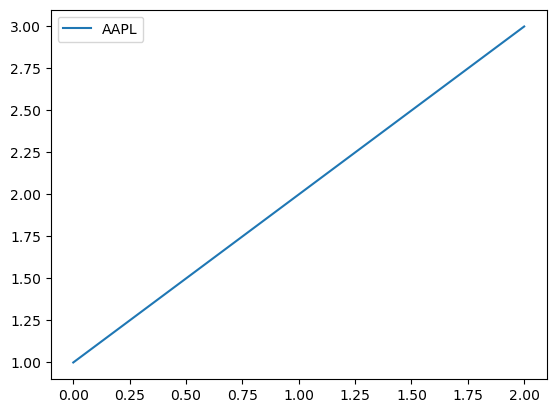

In [11]:
# To complete this refresher, we'll use Pandas to read the data back into a DataFrame.
# In the previous lesson, we used the `read_sql_table` function to read the table back into a DataFrame.
# In this case, however, we want to read only the "AAPL" column.
# To do so, we'll use the `read_sql_query` function instead.
# To use the `read_sql_query` function, we need to pass it the query string and the engine as parameters.
# We'll also plot the new DataFrame:
df = pd.read_sql_query(query, con=engine)
df.plot()

In [12]:
# The plot function generates a plot with the DataFrame on which it is called.
# It uses the columns' data as the Y axis and the index values as the X axis.

In [13]:
# USING CONDITIONAL SELECTION
# In the previous example, we improved our data selection process with the help of the `SELECT` statement.
# But what happens when we work with millions or even billions of rows of data in those columns that we select?
# We need to be even more selective with our data.
# In these cases, we can add CONDITIONAL SELECTION to SQL queries by using the `WHERE` clause.
# With the `WHERE` clause, we can create conditional statements that a SQL query uses to match data to the values that we define.
# This resembles the conditional logic that we used with the `loc` and `iloc` functions.
# In SQL, we can use conditional statements to select only the data that we care about.
# This proves more efficient when we work with large amounts of data.

In [14]:
# REWIND: CONDITIONAL OPERATORS
# Conditional selection is based on the use of CONDITIONAL OPERATORS to evaluate the values we want to get from the database.
# The conditional operators that SQL queries use resemble the ones that conditional statements in Python use.
# They are the following:
    # 1. (=): This means equals. Note that SQL uses an equal sign, whereas Python uses double equals.
    # 2. (>): Greater than
    # 3. (<): Less than
    # 4. (>=): Greater than or equal to 
    # 5. (<=): Less than or equal to

In [15]:
# USE THE WHERE CLAUSE
# As an example, we'll attach a `WHERE` clause to our earlier `SELECT` statement.
# This time, we'll select only the values that are less than 3 from the 'AAPL' column:
query = """
SELECT AAPL
FROM stocks
WHERE AAPL < 3;
"""
aapl_df = pd.read_sql_query(query, con=engine)
aapl_df

,AAPL
0,1
1,2


In [16]:
# Note that the output consists of a DataFrame that contains a single column named "AAPL". 
# This column has two rows of data that contain the values 1 and 2.
# The DataFrame doesn't include a row with the value 3, because this value doesn't meet the condition that the `WHERE` clause specified. 

In [17]:
# JOIN CONDITIONAL STATEMENTS
# We can also use the `WHERE` clause to join conditional statements together, just like we did in Python.
# To do so, we'll use logical operators such as `AND`, `OR`, & `NOT`.
# Let's change our previous query so that we find any 'AAPL' values that match 1 or 3.
# We thus change the query to request the values where the 'AAPL' value equals 1 `OR` the 'AAPL' value equals 3:
query = """
SELECT AAPL
FROM stocks
WHERE AAPL = 1 OR AAPL = 3;
"""
df = pd.read_sql_query(query, con=engine)
df

,AAPL
0,1
1,3


,AAPL,GOOG
0,44,47
1,64,67
2,67,9


,AAPL,GOOG
0,44,47
1,64,67
2,67,9


,AAPL,GOOG
0,44,47
1,64,67
2,67,9


,AAPL,GOOG
0,44,47
1,36,87
2,39,87


,AAPL,GOOG
0,46,88
1,44,47
2,39,87
